# Exercise 1: Plotting functions

Consider the following function in one variable $x$, 
$$
f(x) = \sin(20 x) + 5 x^2
$$
which is the sum of the sine function and a quadratic function.

Perform the following tasks:

1.  Define a Python function that returns the function value $f(x)$ for some 
    argument $x$. The function should work with both scalar numbers and 
    NumPy arrays.

    *Hint:* The sine function is implemented in 
    [`np.sin()`](https://numpy.org/doc/stable/reference/generated/numpy.sin.html).

2.  Evaluate the function on a uniformly spaced grid of $x$-values
    on the interval $[-1, 1]$ using 51 grid points.

    Create a plot depicting the function on this interval. Set the
    $x$-ticks to the values $[-1, 0, 1]$ and add a legend.

3.  Locate the point $x_{min}$ where the function attains its minimum on the grid 
    you created and print the values $(x_{min}, f(x_{min}))$.

    *Hint:* You can use the NumPy function 
    [`np.argmin()`](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html) for this.

4.  Augment the plot you created earlier with a horizontal and vertical
    line indicating where the minimum is located. Add a black dot at the point $(x_{min}, f(x_{min}))$.

    *Hint:* Horizontal and vertical lines can be added with 
    [`axhline()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html)
    and 
    [`axvline()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html).
    A single dot can be added in various ways, e.g., using 
    [`scatter()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).

5.  Repeat the exercise but now use $N=501$ grid points to evaluate the function.

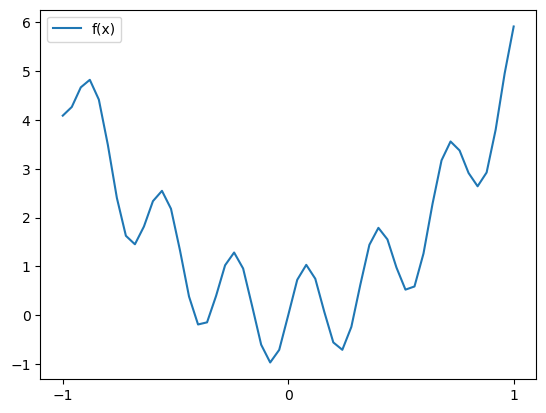

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def f(x):
    return np.sin(20*x) + 5*x**2

xvals = np.linspace(-1,1,51)


plt.plot(xvals, f(xvals))
plt.xticks([-1,0,1])
plt.legend(["f(x)"])
plt.show()


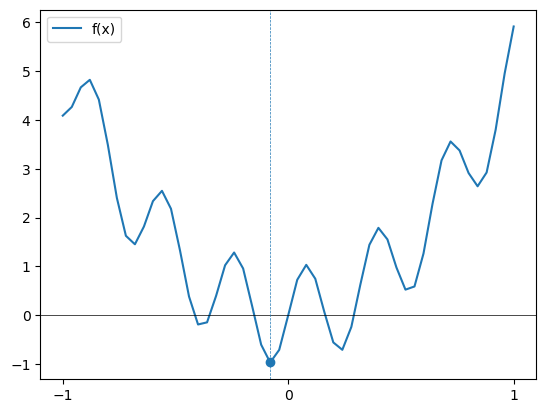

In [13]:
minval = min(f(xvals))
x_min = xvals[np.argmin(f(xvals))]
(x_min, minval)


plt.plot(xvals, f(xvals))
plt.xticks([-1,0,1])
plt.legend(["f(x)"])
plt.axhline(0, ls="-", lw=0.5, c="black")
plt.axvline(x_min, ls="--", lw=0.5)
plt.scatter([x_min], [minval])
plt.show()

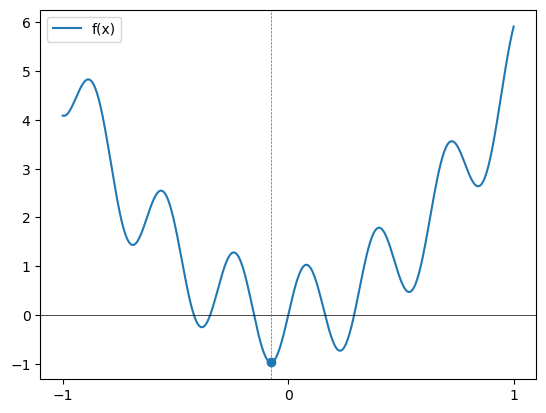

In [14]:
xvals = np.linspace(-1,1,501)

minval = min(f(xvals))
x_min = xvals[np.argmin(f(xvals))]
(x_min, minval)

plt.plot(xvals, f(xvals))
plt.xticks([-1,0,1])
plt.legend(["f(x)"])
plt.axhline(0, ls="-", lw=0.5, c="black")
plt.axvline(x_min, ls="--", lw=0.5)
plt.scatter([x_min], [minval])
plt.show()

***
# Exercise 2: Visualizing US business cycles and recessions

In this exercise you are asked to plot two main business cycle indicators, GDP growth and the unemployment rate, for the United States.

1.  Load the data from the CSV file `FRED/FRED_quarterly.csv` located in the repository's `data` folder.

    Familiarize yourself with the data by printing the columns present in the data set and the first 5 rows of data.

    *Hint:* Use `pd.read_csv(..., parse_dates=['DATE'], index_col='DATE')` to automatically parse strings stored in the `DATE` column as dates and set `DATE` as the index.

2.  Compute the quarterly GDP growth (i.e., the relative change of the column `GDP` vs. the previous quarter) in percent.

    *Hint:* This can be achieved using the 
    [`pct_change()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html) method.

3.  Create a figure with two subplots (arranged in 2 rows) which show the GDP growth and the unemployment rate.

    *Hint:* You can construct the graph either using Matplotlib's plotting function or using 
    pandas's
    [`DataFrame.plot`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html).

4.  You want to understand how the business cycle dynamics correspond to the official US recession dates
    as determined by National Bureau of Economic Research (NBER), the agency tasked with dating business 
    cycles in the US.

    Recessions are defined as periods after GDP peaked (the corresponding quarter is stored in the 
    `peak` column) until GDP started growing again (stored in the `trough` column). 

    1.  Load the business cycle dates from `NBER_cycle_dates.csv` located in the `data/` folder.

        Drop all rows where the `peak` date starts before 1948.

        *Hint:* Use `pd.read_csv(..., parse_dates=['peak', 'trough']` to automatically parse strings in the `peak` and `trough`
        columns.

    2.  Loop through all remaining business cycle peak dates and add a vertical line to
        each of the two subplots for GDP growth and unemployment at each date. 
        These lines indicate quartes which were followed by a recession.

    3.  Can you detect any patterns for GDP growth and the unemployment rate after each peak date?

In [18]:
DATAPATH = "../../data"

filename = f"{DATAPATH}/FRED/FRED_quarterly.csv"

quarterly = pd.read_csv(filename)

quarterly.iloc[:5]

,DATE,Year,Quarter,GDP,CPI,UNRATE,FEDFUNDS,REALRATE,LFPART
0,1948-01-01,1948,1,2239.7,23.7,3.4,NaN,NaN,58.6
1,1948-04-01,1948,2,2276.7,23.8,3.9,NaN,NaN,59.0
2,1948-07-01,1948,3,2289.8,24.4,3.6,NaN,NaN,59.3
3,1948-10-01,1948,4,2292.4,24.3,3.7,NaN,NaN,58.7
4,1949-01-01,1949,1,2260.8,24.0,4.3,NaN,NaN,58.7


In [21]:
quarterly.columns

Index(['DATE', 'Year', 'Quarter', 'GDP', 'CPI', 'UNRATE', 'FEDFUNDS',
       'REALRATE', 'LFPART'],
      dtype='object')

In [31]:
gdp_growth = round(quarterly["GDP"].pct_change() * 100, 2).values
gdp_growth

array([  nan,  1.65,  0.58,  0.11, -1.38, -0.34,  1.03, -0.83,  3.93,
        3.05,  3.86,  1.92,  1.36,  1.73,  2.06,  0.22,  1.07,  0.21,
        0.72,  3.28,  1.86,  0.77, -0.56, -1.52, -0.48,  0.11,  1.13,
        1.96,  2.85,  1.63,  1.35,  0.6 , -0.39,  0.83, -0.09,  1.65,
        0.64, -0.22,  0.98, -1.03, -2.6 ,  0.66,  2.31,  2.34,  1.92,
        2.26,  0.07,  0.28,  2.25, -0.54,  0.49, -1.28,  0.67,  1.7 ,
        1.92,  1.96,  1.78,  0.9 ,  1.23,  0.33,  1.09,  1.12,  2.2 ,
        0.65,  2.11,  1.09,  1.56,  0.31,  2.42,  1.26,  2.22,  2.31,
        2.43,  0.34,  0.85,  0.82,  0.89,  0.06,  0.95,  0.75,  2.04,
        1.67,  0.78,  0.39,  1.56,  0.3 ,  0.66, -0.49, -0.15,  0.14,
        0.92, -1.07,  2.72,  0.54,  0.82,  0.23,  1.84,  2.27,  0.94,
        1.67,  2.47,  1.09, -0.53,  0.95, -0.86,  0.24, -0.95, -0.39,
       -1.22,  0.72,  1.71,  1.35,  2.25,  0.73,  0.55,  0.72,  1.19,
        1.94,  1.8 ,  0.  ,  0.32,  3.86,  1.01,  1.35,  0.18,  0.11,
        0.74,  0.25,

In [49]:
quarterly.set_index("DATE")

,Year,Quarter,GDP,CPI,UNRATE,FEDFUNDS,REALRATE,LFPART
DATE,,,,,,,,
1948-01-01,1948,1,2239.7,23.7,3.4,NaN,NaN,58.6
1948-04-01,1948,2,2276.7,23.8,3.9,NaN,NaN,59.0
1948-07-01,1948,3,2289.8,24.4,3.6,NaN,NaN,59.3
1948-10-01,1948,4,2292.4,24.3,3.7,NaN,NaN,58.7
1949-01-01,1949,1,2260.8,24.0,4.3,NaN,NaN,58.7
...,...,...,...,...,...,...,...,...
2023-10-01,2023,4,22960.6,307.7,3.9,5.3,3.2,62.7
2024-01-01,2024,1,23053.5,309.8,3.7,5.3,2.5,62.5
2024-04-01,2024,2,23223.9,313.0,3.9,5.3,2.1,62.7


np.int64(1948)

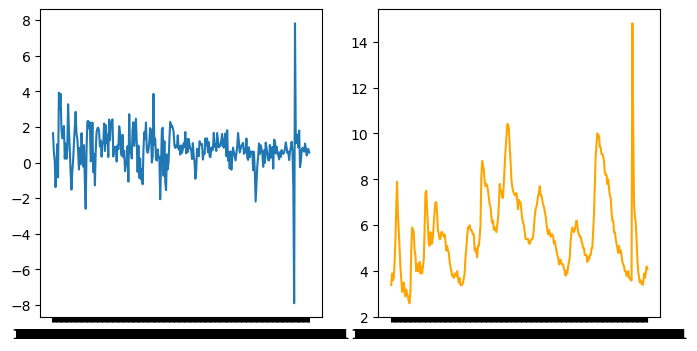

In [67]:
#plt.plot(quarterly["Year"], gdp_growth)

fig, axes = plt.subplots(1,2, figsize=(8,4))
axes[0].plot(quarterly["DATE"], gdp_growth)
axes[1].plot(quarterly["DATE"], quarterly["UNRATE"], c="orange")

<Axes: xlabel='DATE'>

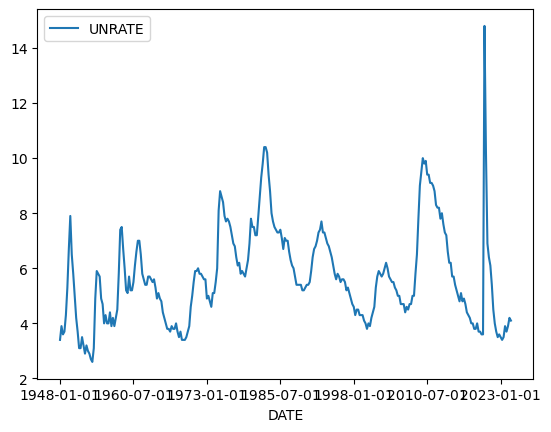

In [68]:
quarterly.plot(x="DATE", y="UNRATE")

In [ ]:
filename = f"{DATAPATH}/NBER_cycle_dates.csv"

cycles = pd.read_csv(filename, parse_dates=["peak", "trough"])
cycles["peak"] = pd.to_datetime(cycles["peak"])
cycles = cycles.query("peak > '1948-01-01'")
cycles


,peak,trough
23,1948-11-01,1949-10-01
24,1953-07-01,1954-05-01
25,1957-08-01,1958-04-01
26,1960-04-01,1961-02-01
27,1969-12-01,1970-11-01
28,1973-11-01,1975-03-01
29,1980-01-01,1980-07-01
30,1981-07-01,1982-11-01
31,1990-07-01,1991-03-01
32,2001-03-01,2001-11-01


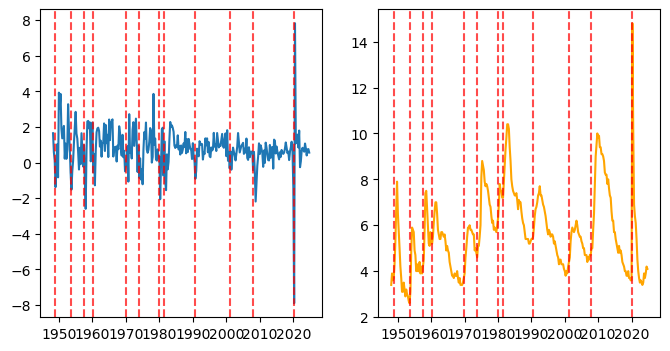

In [106]:

# Ensure DATE column is datetime
quarterly["DATE"] = pd.to_datetime(quarterly["DATE"])

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].plot(quarterly["DATE"], gdp_growth)
axes[1].plot(quarterly["DATE"], quarterly["UNRATE"], c="orange")
for i in range(len(cycles)):
    axes[0].axvline(cycles["peak"].iloc[i], color='red', linestyle='--', alpha=0.7)
    axes[1].axvline(cycles["peak"].iloc[i], color='red', linestyle='--', alpha=0.7)

***
# Exercise 3: Daily returns of US stock market indices

In this exercise, we examine how the three major US stock market indices performed in 2024.
Use the data in `indices.csv` from the folder `../../data/stockmarket` to solve the following tasks:

1.  Load the CSV data and restrict the sample to the calendar year 2024. 

    *Hint:* The data is tab-separated, so you need to specify `sep='\t'` when reading in the data.

    *Hint:* You should use `pd.read_csv(..., parse_dates=['Date'])` to automatically parse strings stored in the `Date` column as dates.

2.  The data comes in a "long" format where each date-ticker combination is stored in 
    a separate row. For the following analysis, the data needs to be reshaped such that each 
    ticker symbol is in its own column ("wide" format).

    Use the [`pivot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html)
    method to reshape the `DataFrame` into the desired form. Consult the 
    [user guide](https://pandas.pydata.org/docs/user_guide/reshaping.html#pivot-and-pivot-table)
    to see a graphical illustration.

    Your pivoted `DataFrame` should look as follows:
    
    |    Ticker	 |   DJIA    | NASDAQ  |  SP500 |
    |------------|-----------|---------|--------|
    | Date		 |           |	       |        |
    | 2024-01-02 |	37715.0	 | 14765.9 | 4742.8 |
    | 2024-01-03 |  37430.2	 | 14592.2 | 4704.8 |
    
3.  Create a line plot which shows the time series for each of the three ticker symbols in a single graph,
    for example using [`DataFrame.plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot).
4.  The graph you just created is not very satisfactory as the three
    indices are recorded on vastly different scales. Express each index
    relative to its initial value in 2024 (so that all three start with the value
    1.0) and recreate the previous graph with this normalized data.
5.  Another way to check whether the three indices are co-moving is to compute and plot their daily returns.
    For each index, compute the daily returns, i.e., the relative change vs. the previous closing price in percent (e.g., using 
    [`pct_change()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html)), 
    and plot the three time series of daily returns in a single graph.
6.  The previous plots suggests that the three indices co-move a lot. 
    
    1.  In order to quantify the strength of 
        this co-movement, compute the pairwise correlations of daily returns using 
        [`corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html).

    2.  Create a figure with 3-by-3 subplots where each off-diagonal plot shows the 
        scatter plot for two of the indices.
    
        *Hint:* You can use the function [`scatter_matrix()`](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html) to accomplish this task. Alternatively, you can create a figure with 3-by-3 subplots using Matplotlib's 
        [`subplots()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html), iterate over all rows and columns and add a [`scatter()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) plot to each `axes` object.

    3.  Add the correlation coefficient for each stockmarket index pair 
        as text to the corresponding subplot in the figure you created
        (this can be done using [`text()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html)).